# COMP30760 - Assignment 2 - Student ID: 19206730

## Task 1: Data Collection and Initial Characterisation

**This notebook covers tasks 1 to 4 of Assignment 2. In the first task, the HTML data is collected from the given web API using a unique student number: 19206730.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the HTML data and display its contents:**

**(Here parse_dates is used to preprocess the details of the dates to make it easier for analysis later in the notebook.)**

In [2]:
house_data = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/assign2/19206730.html", parse_dates=["Date of Sale"])
house_data

[    Date of Sale        Price    Location  Year Built         Size  \
 0     2016-01-03  €638,740.00  Brookville        2011  1,849 sq ft   
 1     2016-01-03  €465,095.00  Brookville        2002  1,163 sq ft   
 2     2016-01-07  €546,330.00  Brookville        2009  1,551 sq ft   
 3     2016-01-07  €711,386.00  Brookville        2007  2,008 sq ft   
 4     2016-01-10  €376,039.00    West End        1963  1,073 sq ft   
 ..           ...          ...         ...         ...          ...   
 934   2019-12-27  €228,647.00   Rivermont        1946    887 sq ft   
 935   2019-12-27  €351,808.00   Rivermont        1912  2,411 sq ft   
 936   2019-12-28  €410,983.00    Oakbrook        1968  1,453 sq ft   
 937   2019-12-29  €531,880.00    West End        2010  2,283 sq ft   
 938   2019-12-29  €462,363.00    West End        2006   1,739 sqft   
 
                                            Description  
 0    Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...  
 1    Type: Detached; Style: 1

**The contents are displayed in a dataframe before any preprocessing is done on the initial data:**

In [3]:
initial_df = pd.DataFrame(house_data[0])
initial_df.set_index("Date of Sale", inplace=True)
initial_df

,Price,Location,Year Built,Size,Description
Date of Sale,,,,,
2016-01-03,"€638,740.00",Brookville,2011,"1,849 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
2016-01-03,"€465,095.00",Brookville,2002,"1,163 sq ft",Type: Detached; Style: 1-Story; 4 Bedrooms; 2 ...
2016-01-07,"€546,330.00",Brookville,2009,"1,551 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
2016-01-07,"€711,386.00",Brookville,2007,"2,008 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
2016-01-10,"€376,039.00",West End,1963,"1,073 sq ft",Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 ...
...,...,...,...,...,...
2019-12-27,"€228,647.00",Rivermont,1946,887 sq ft,Type: Bunaglow; Style: 1-Story; 2 Bedrooms; 1 ...
2019-12-27,"€351,808.00",Rivermont,1912,"2,411 sq ft",4 Bedrooms; Style: 2-Story; 2 Bathrooms; Type:...
2019-12-28,"€410,983.00",Oakbrook,1968,"1,453 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...


In [4]:
initial_df.dtypes

Price          object
Location       object
Year Built      int64
Size           object
Description    object
dtype: object

**From investigating the types of the content in the initial data, the need for further action on these data types are as follows:**
- Date of Sale --> no need for futher processing as it was initialised as a datetime data type which makes it ready for use
- Price --> further processing is needed to change the type from object to float, making the data easier to analyse
- Year Built --> no need for futher processing as int datatype is suitable for analysis
- Size --> further processing is needed to change the type from object to int
- Description --> further processing is needed and will be handled in Task 3b

**These datatypes are adjusted accordingly:**

In [5]:
df = pd.DataFrame.copy(initial_df)
df["Price"] = df["Price"].apply(lambda x: float(x.replace("€", "").replace(",", "")))
df["Size"] = df["Size"].apply(lambda x: int(x.replace(" sq ft", "").replace(" sqft", "").replace(",", "")))
df["Description"] = df["Description"].astype("string")
df

,Price,Location,Year Built,Size,Description
Date of Sale,,,,,
2016-01-03,638740.0,Brookville,2011,1849,Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
2016-01-03,465095.0,Brookville,2002,1163,Type: Detached; Style: 1-Story; 4 Bedrooms; 2 ...
2016-01-07,546330.0,Brookville,2009,1551,Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
2016-01-07,711386.0,Brookville,2007,2008,Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
2016-01-10,376039.0,West End,1963,1073,Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 ...
...,...,...,...,...,...
2019-12-27,228647.0,Rivermont,1946,887,Type: Bunaglow; Style: 1-Story; 2 Bedrooms; 1 ...
2019-12-27,351808.0,Rivermont,1912,2411,4 Bedrooms; Style: 2-Story; 2 Bathrooms; Type:...
2019-12-28,410983.0,Oakbrook,1968,1453,Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...


**Changes in the datatypes can be viewed as such:**

In [6]:
df.dtypes

Price          float64
Location        object
Year Built       int64
Size             int64
Description     string
dtype: object

**As an initial analysis, the trends of the value "Price" is investigated against different attributes: "Location" and "Year Built".**

**Location x Price --> The price range of different areas from the  most expensive to least expensive are found to be:**

1. Beacon Hill
2. Avoca
3. Brookville
4. West End
5. Oakbrook
6. Rivermont
7. East End

**The graph depicting these foundings can be viewed below:**

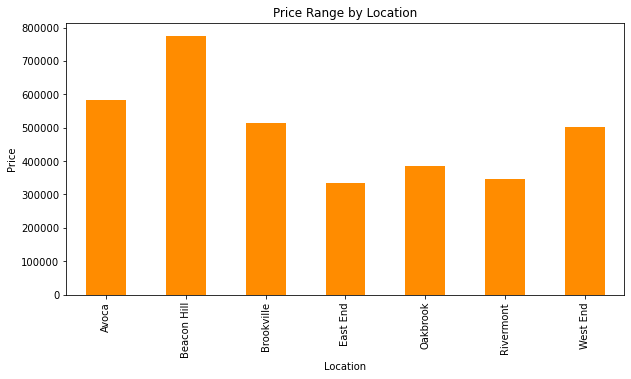

In [7]:
graph1_df = df[["Location","Price"]].copy()
mean_location = graph1_df.groupby(["Location"])["Price"].mean()
graph1 = mean_location.plot(kind="bar", figsize=(10,5), title="Price Range by Location", color="darkorange")
graph1.set(xlabel="Location", ylabel="Price")
plt.show()

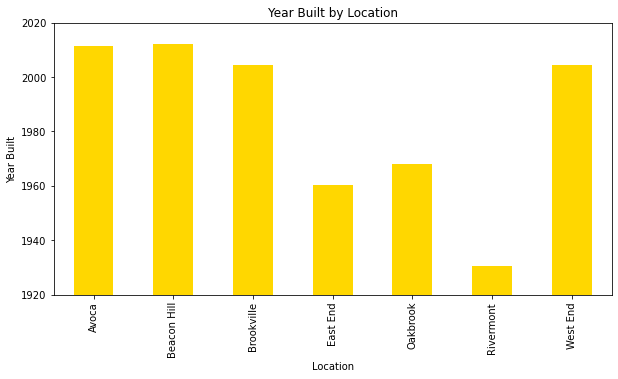

In [8]:
graph2_df = df[["Location","Year Built"]].copy()
mean_location = graph2_df.groupby(["Location"])["Year Built"].mean()
graph1 = mean_location.plot(kind="bar", figsize=(10,5), title="Year Built by Location", color="gold", linewidth=10)
graph1.set(xlabel="Location", ylabel="Year Built")
plt.ylim(1920, 2020)
plt.show()

**Locations that have houses in the order of newest to oldest:**
1. Beacon Hill
2. Avoca
3. West End
4. Brookville
5. Oakbrook
6. East End
7. Rivermont

**From these two graphs, it can be concluded that Beacon Hill and Avoca are the newest and the most expensive estates while Oakbrook, East End and Rivermont are the cheaper and older options. These trends will be further investigated in Task 3.**

## Task 2: Time Series Analysis

### Task 2a: Daily, Monthly and Quarterly Sales

**Daily, Monthly and Quarterly dataframes are initialised to be used in plotting graphs:**

In [9]:
d_df = df.copy()
daily_df = d_df.loc["2016-01-03":]
daily_df = daily_df.groupby(pd.Grouper(freq="D"))
daily = daily_df.agg({"Price":"count"})

m_df = df.copy()
monthly_df = m_df.loc["2016-01-03":]
monthly_df = monthly_df.groupby(pd.Grouper(freq="M"))
monthly = monthly_df.agg({"Price":"count"})

q_df = df.copy()
quarterly_df = q_df.loc["2016-01-03":]
quarterly_df = quarterly_df.groupby(pd.Grouper(freq="Q"))
quarterly = quarterly_df.agg({"Price":"count"})

**Graphs for each analysis respectively:**

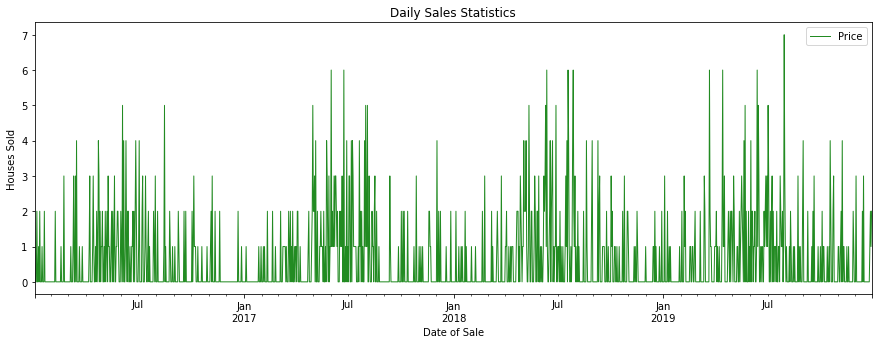

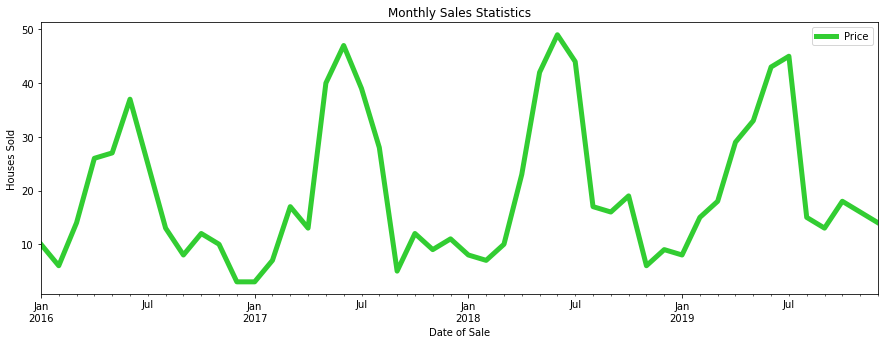

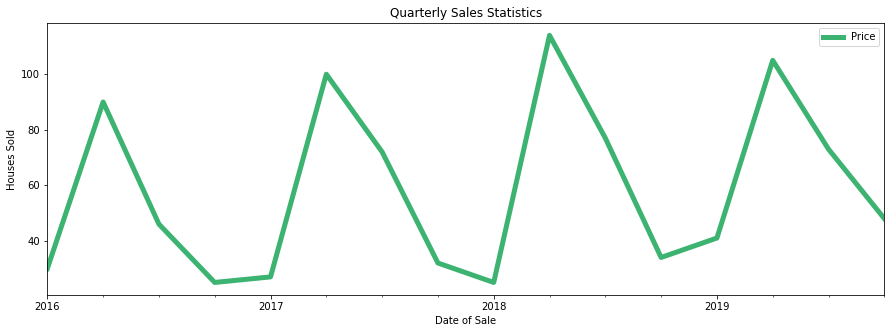

In [10]:
daily.plot(use_index=True, y="Price", title="Daily Sales Statistics", color = "forestgreen" , figsize=(15, 5), linewidth=1)
plt.xlabel("Date of Sale")
plt.ylabel("Houses Sold")

monthly.plot(use_index=True, y="Price", title="Monthly Sales Statistics", color = "limegreen" , figsize=(15, 5), linewidth=5)
plt.xlabel("Date of Sale")
plt.ylabel("Houses Sold")

quarterly.plot(use_index=True, y="Price", title="Quarterly Sales Statistics", color = "mediumseagreen" , figsize=(15, 5), linewidth=5)
plt.xlabel("Date of Sale")
plt.ylabel("Houses Sold")
plt.show()

**Here are some remarks about the data and trends from these graphs:**
- Quarterly Sales --> The recursive trend each year is that in the first quarter, house sales start to increase with achieving a peak in the second quarter and from the second quarter onwards, there is a descrease in the sales with the lowest numbers being in the fourth quarter of the year. 


- Monthly Sales --> When the quarterly trends are further analysed with investigating each month or each quarter individually, it is found:
    - Overall, June-July-August months are the best every year to achieve maximum house sales numbers. 
    - There is usually a small decline around February each year in the peak in the first quarter. 
    - In the decline that happens in the third and fourth quarters of each year, October can still be a good month for house sales as there is always a small peak around this time. 
  
  
- Daily Sales --> From the Quarterly graph, we can observe that there is a small increase in the number of houses sold from 2016 to 2018 with 2018 achieving the maximum number of all four years combined. However, with a more detailed observation from the Daily graph, it can be further observed that the highest ever number of houses sold is in August 2019.

### Task 2b: Changes in the Avegare Monthly Sales

**With utilising the graph below, the correlation of the foundings from Task 2a (Number of Houses Sold x Date of Sale) and Task 2b (Prices of Houses Sold x Date of Sale) are compared to each other.**

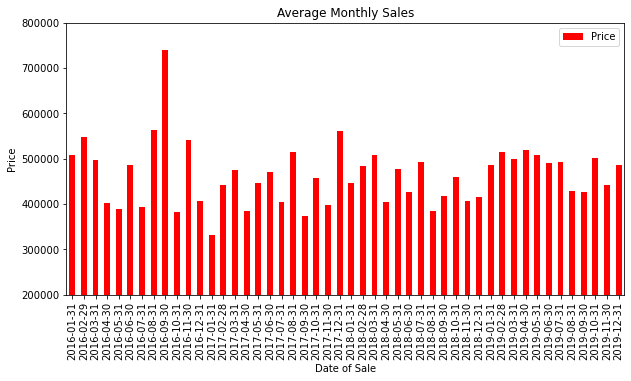

In [11]:
dfAvg = df.copy()
df = dfAvg.loc["03 Jan, 2016":]

average = df.groupby(pd.Grouper(freq="M"))
df_average = monthly_df.agg({"Price":"mean"})

df_average.index = df_average.index.date
df_average.plot(kind="bar", use_index=True, y="Price", title="Average Monthly Sales", color="red", figsize=(10,5))
plt.xlabel("Date of Sale")
plt.ylim(200000, 800000)
plt.ylabel("Price")
plt.show()

**From this graph, it can be seen again that the end of the second quarter and the start of the third quarter are usually good times for sales each year. From Task 2a's standpoint, second quarter is where there is a constant increase in the number of houses sold and a peak is reached. As for the third quarter, the numbers are still high with a constant decline over the course of these 3 months.**

### Task 2c: Average Monthly Sales by Location

**From the first graph "Location x Price" in Task 1, locations were listed according to their price range in the decreasing order as such:**
1. Beacon Hill
2. Avoca
3. Brookville
4. West End
5. Oakbrook
6. Rivermont
7. East End

**From the second graph "Location x Year Built" in Task 1, locations were listed from newest to oldest as such:**
1. Beacon Hill
2. Avoca
3. West End
4. Brookville
5. Oakbrook
6. East End
7. Rivermont

**In Task 2c, these locations are investigated individually according to their Average Monthly Sales Prices following the order of price.**

In [12]:
dataframe = df[["Location","Price"]].copy()
x_label = "Price"
y_label = "Date of Sale"

#### #1 Beacon Hill:

- Average Price Range (min-max) = 550,000 - 1,100,000 Euros
- Best Months to be Selling (highest prices) = 2nd Quarter Months: March(03), April (04), May (05)
- Best Months to be Buying (lowest prices) = August (08), October (10)

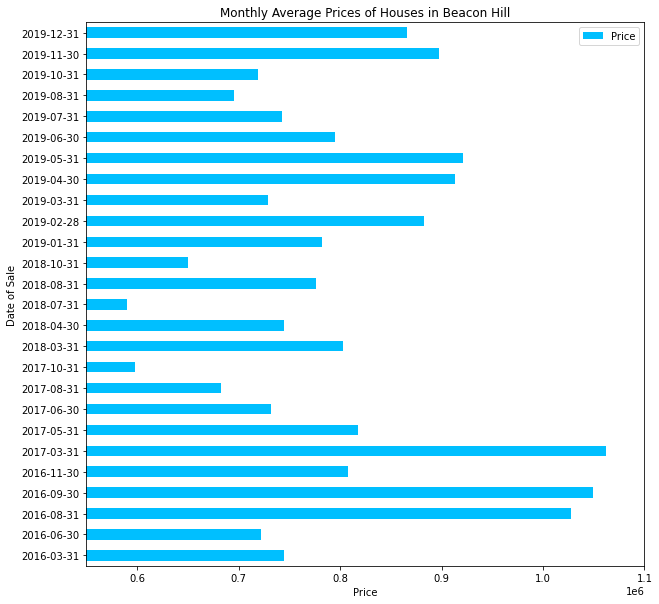

In [13]:
BeaconHill_df = dataframe.query("Location == 'Beacon Hill'")
grouped_avg = BeaconHill_df.groupby(pd.Grouper(freq="M"))
BeaconHill_avg = grouped_avg.agg({"Price":"mean"})
BeaconHill_avg = BeaconHill_avg.dropna()

BeaconHill_avg.index = BeaconHill_avg.index.date
BeaconHill_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in Beacon Hill", color = "deepskyblue" , figsize=(10,10))
plt.xlabel(x_label)
plt.xlim(550000, 1100000)
plt.ylabel(y_label)
plt.show()

Highest months:
- 2017-03
- 2016-09
- 2019-05
- 2019-04

Lowest months:
- 2018-07
- 2017-10
- 2018-10
- 2017-08
- 2019-08

#### #2. Avoca:
- Average Price Range (min-max) = 400,000 - 700,000 Euros
- Best Month(s) to be Selling (highest prices) = 2nd Quarter Months: April (04), May (05) or 4th Quarter Months: October (10), November (11)
- Best Month(s) to be Buying (lowest prices) = March (03)

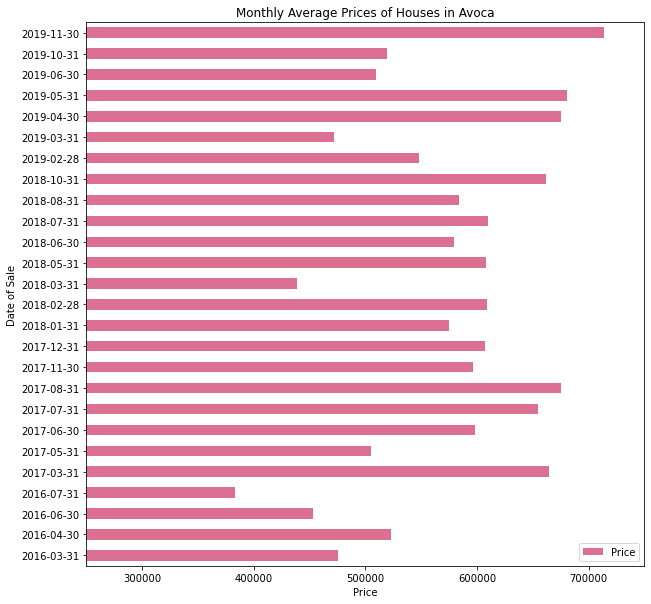

In [14]:
Avoca_df = dataframe.query("Location == 'Avoca'")
grouped_avg = Avoca_df.groupby(pd.Grouper(freq="M"))
Avoca_avg = grouped_avg.agg({"Price":"mean"})
Avoca_avg = Avoca_avg.dropna()

Avoca_avg.index = Avoca_avg.index.date
Avoca_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in Avoca", color="palevioletred", figsize=(10,10))
plt.xlabel(x_label)
plt.xlim(250000, 750000)
plt.ylabel(y_label)
plt.show()

Highest 5 months:
- 2019-11
- 2019-05
- 2019-04
- 2017-08
- 2018-10

Lowest 5 months:
- 2016-07
- 2018-03
- 2016-06
- 2016-03
- 2019-03

#### #3. Brookville:
- Average Price Range (min-max) = 300,000 - 800,000 Euros
- Best Month(s) to be Selling (highest prices) = 3rd Quarter Months: June (06), July (07)
- Best Month(s) to be Buying (lowest prices) = November (11)

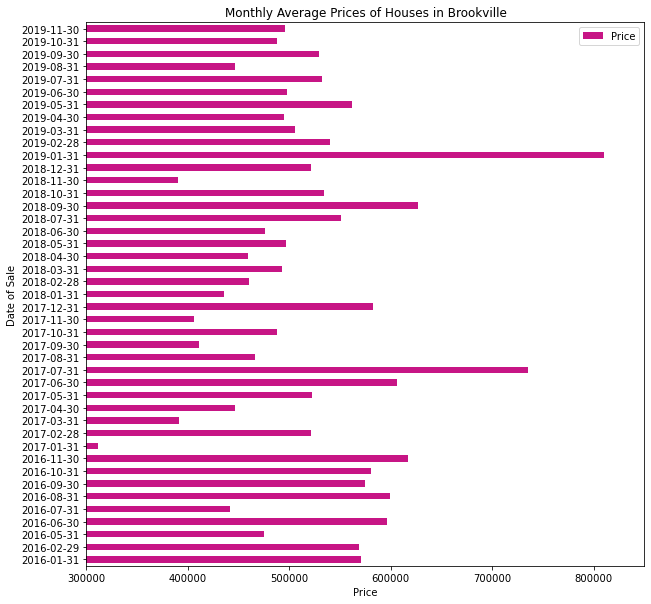

In [15]:
Brookville_df = dataframe.query("Location == 'Brookville'")
grouped_avg = Brookville_df.groupby(pd.Grouper(freq="M"))
Brookville_avg = grouped_avg.agg({"Price":"mean"})
Brookville_avg = Brookville_avg.dropna()

Brookville_avg.index = Brookville_avg.index.date
Brookville_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in Brookville", color="mediumvioletred", figsize=(10,10))
plt.xlabel(x_label)
plt.xlim(300000, 850000)
plt.ylabel(y_label)
plt.show()

Highest 5 months:
- 2019-01
- 2017-07
- 2018-09
- 2016-11
- 2017-06

Lowest 5 months:
- 2017-01
- 2018-11
- 2017-03
- 2017-11
- 2017-09

#### #4. East End:
- Average Price Range (min-max) = 100,000 - 900,000 Euros
- Best Month(s) to be Selling (highest prices) = 2nd Quarter Months: February (02), March (03)
- Best Month(s) to be Buying (lowest prices) = July (07)

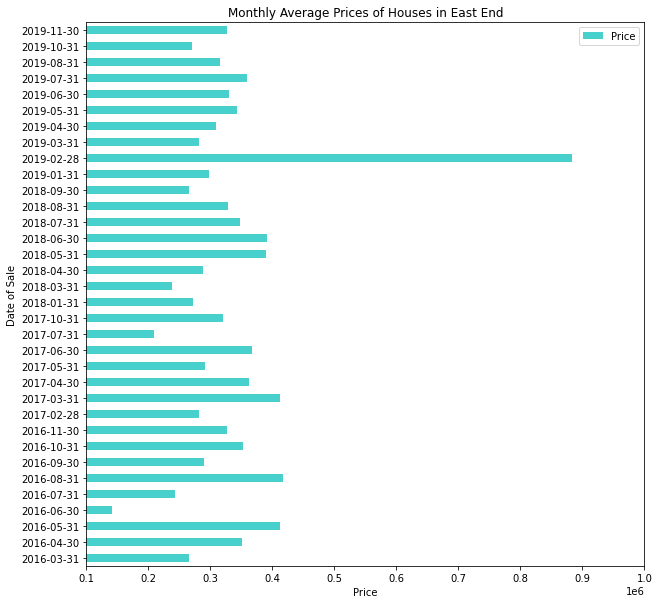

In [16]:
EastEnd_df = dataframe.query("Location == 'East End'")
grouped_avg = EastEnd_df.groupby(pd.Grouper(freq="M"))
EastEnd_avg = grouped_avg.agg({"Price":"mean"})
EastEnd_avg = EastEnd_avg.dropna()

EastEnd_avg.index = EastEnd_avg.index.date
EastEnd_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in East End", color="mediumturquoise", figsize=(10,10))
plt.xlabel(x_label)
plt.xlim(100000, 1000000)
plt.ylabel(y_label)
plt.show()

Highest 5 months:
- 2019-02
- 2017-03
- 2016-08
- 2018-06
- 2018-05

Lowest 5 months:
- 2016-06
- 2017-07
- 2018-03
- 2016-07
- 2018-09

#### #5. OakBrook:
- Average Price Range (min-max) = 300,000 - 450,000 Euros
- Best Month(s) to be Selling (highest prices) = 4th Quarter Months: October (10), December (12)
- Best Month(s) to be Buying (lowest prices) = August (08)


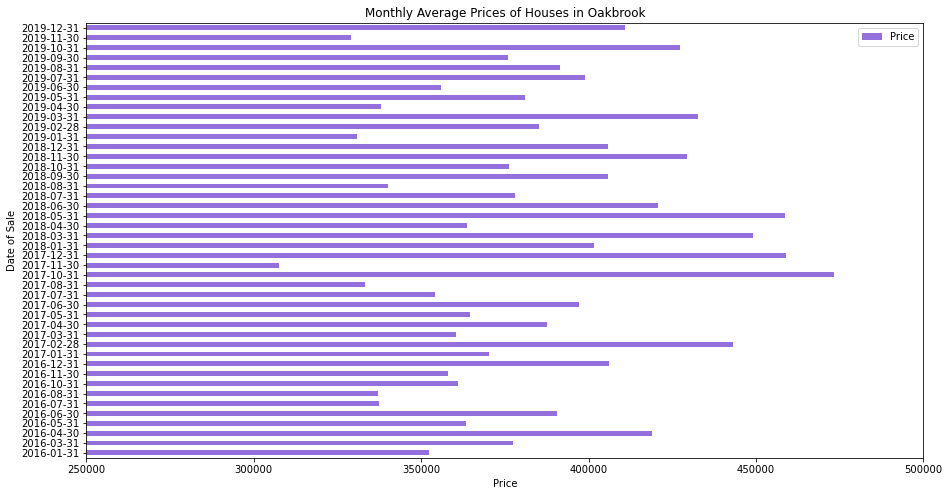

In [17]:
OakBrook_df = dataframe.query("Location == 'Oakbrook'")
OakBrook_avg = OakBrook_df.groupby(pd.Grouper(freq="M"))
OakBrook_avg = OakBrook_avg.agg({"Price":"mean"})
OakBrook_avg = OakBrook_avg.dropna()

OakBrook_avg.index = OakBrook_avg.index.date
OakBrook_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in Oakbrook", color="mediumpurple", figsize=(15,8))
plt.xlabel(x_label)
plt.xlim(250000, 500000)
plt.ylabel(y_label)
plt.show()

Highest 5 months:
- 2017-10
- 2018-05
- 2017-12
- 2018-03
- 2017-02

Lowest 5 months:
- 2017-11
- 2017-08
- 2019-01
- 2016-08
- 2018-07

#### #6. Rivermont:
- Average Price Range (min-max) = 100,000 - 900,000 Euros
- Best Month(s) to be Selling (highest prices) = May (05)
- Best Month(s) to be Buying (lowest prices) = March (03), October (10)

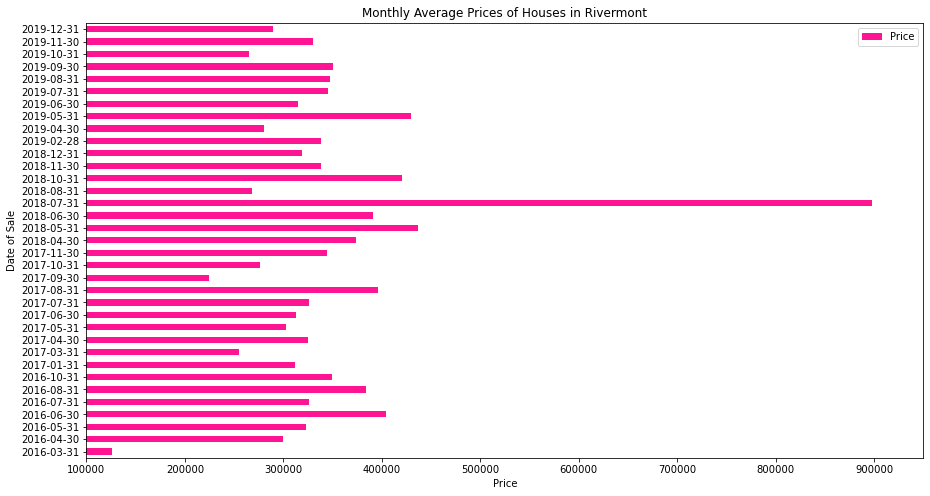

In [18]:
Rivermont_df = dataframe.query("Location == 'Rivermont'")
Rivermont_avg = Rivermont_df.groupby(pd.Grouper(freq="M"))
Rivermont_avg = Rivermont_avg.agg({"Price":"mean"})
Rivermont_avg = Rivermont_avg.dropna()

Rivermont_avg.index = Rivermont_avg.index.date
Rivermont_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in Rivermont", color="deeppink", figsize=(15,8))
plt.xlabel(x_label)
plt.xlim(100000, 950000)
plt.ylabel(y_label)
plt.show()

Highest 5 months:
- 2018-07
- 2018-05
- 2018-10
- 2019-05
- 2016-06

Lowest 5 months:
- 2016-03
- 2017-09
- 2017-03
- 2017-10
- 2019-10

#### #7. West End:
- Average Price Range (min-max) = 400,000 - 800,000 Euros
- Best Month(s) to be Selling (highest prices) = July (07)
- Best Month(s) to be Buying (lowest prices) = December (12)

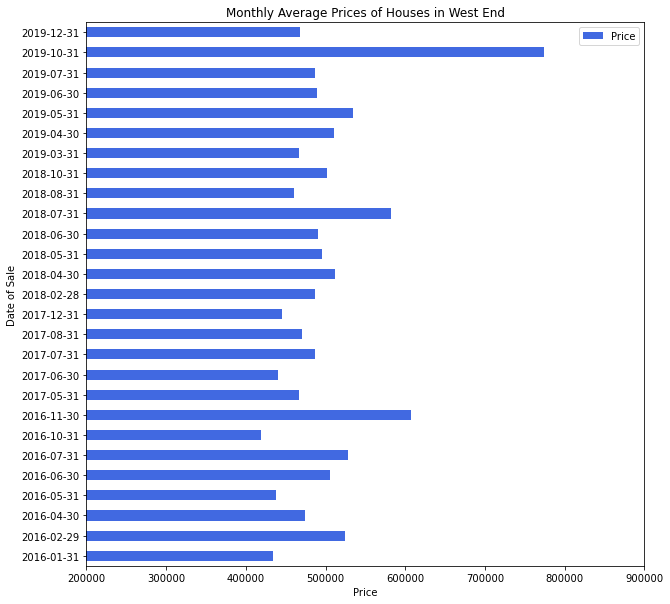

In [19]:
WestEnd_df = dataframe.query("Location == 'West End'")
grouped_avg = WestEnd_df.groupby(pd.Grouper(freq="M"))
WestEnd_avg = grouped_avg.agg({"Price":"mean"})
WestEnd_avg = WestEnd_avg.dropna()

WestEnd_avg.index = WestEnd_avg.index.date
WestEnd_avg.plot(kind="barh", use_index=True, y="Price", title="Monthly Average Prices of Houses in West End", color="royalblue", figsize=(10,10))
plt.xlabel(x_label)
plt.xlim(200000, 900000)
plt.ylabel(y_label)
plt.show()

Highest 5 months:
- 2019-10
- 2016-11
- 2018-07
- 2019-05
- 2016-07

Lowest 5 months:
- 2016-10
- 2016-01
- 2016-05
- 2017-12
- 2019-12

## Task 3: Correlation and Regression

### Task 3a: Prices compared to other numerical features

**In Task 3a, "Year Built x Price", "Size x Price" and "Size x Year Built" graphs are investigated individually and against each other. Graphs and foundings derived from these can be seen bellow:**

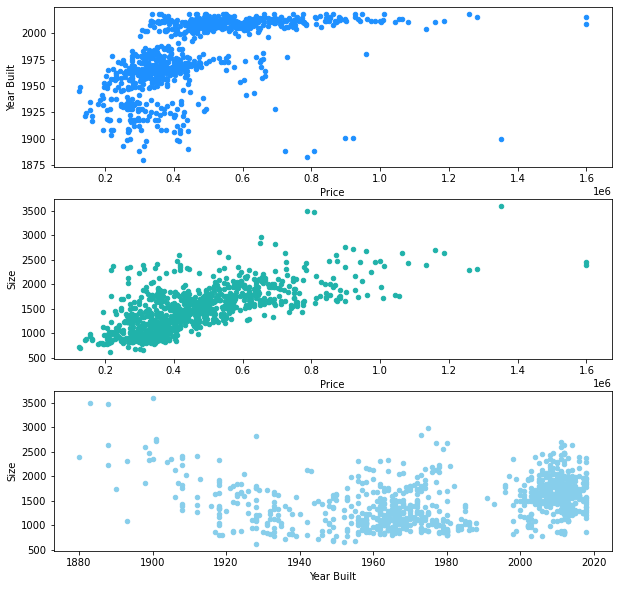

In [20]:
task3a_df = df[["Year Built","Price"]].copy()
fig, ax = plt.subplots(3, figsize=(10, 10))

ax[0].scatter(x=df["Price"], y=df["Year Built"], color="dodgerblue", s=20)
ax[0].set_xlabel("Price")
ax[0].set_ylabel("Year Built")

ax[1].scatter(x=df["Price"], y=df["Size"], color="lightseagreen", s=20)
ax[1].set_xlabel("Price")
ax[1].set_ylabel("Size")

ax[2].scatter(x=df["Year Built"], y=df["Size"], color="skyblue", s=20)
ax[2].set_xlabel("Year Built")
ax[2].set_ylabel("Size")

plt.show()

**Foundings:**
- Year Built x Price --> It can be clearly seen from the scatterplot that as the years progressed, housing prices have increased overall with a fairly dramatic increase in the last 20 years.


- Size x Price --> From the second scatterplot graph, it can be observed that there is a strong correlation between the price and the size of a house. Most houses fall into the 1000-2000 square ft size range and 200,000-800,000 euros price range.


- Size x Year Built --> The last scatterplot shows the relationship between the size and the age of a house. Most of the houses can be seen to have built over the 1950-1980 period and 2000-2020 period. In the first period, house sizes are mostly between 1000-1500 square ft and in the second period between 1000-2000. This underlines the slight increase in house sizes and we can realise its effects in house prices from the "Year Built x Price" graph.

### Task 3b: Prices compared to other categorical features

**In Task 3b, preprocessing is continued from Task 1 for the column "Description" which involves houses' different features: type, style, number of bedrooms, number of bathrooms. In Task 1, the values were turned into a string for further processing. In this task, these strings are used for creating dataframe to store these values and process them. First, the string element of the dataframe is split between its contents to get to the desired individual values:**

In [21]:
complete_df = df.copy()
splitted_description = complete_df["Description"].str.split(";")
splitted_description

Date of Sale
2016-01-03    [Type: Detached,  Style: 2-Story,  3 Bedrooms,...
2016-01-03    [Type: Detached,  Style: 1-Story,  4 Bedrooms,...
2016-01-07    [Type: Detached,  Style: 1-Story,  3 Bedrooms,...
2016-01-07    [Type: Detached,  Style: 2-Story,  3 Bedrooms,...
2016-01-10    [Type: Terraced,  Style: 1-Story,  3 Bedrooms,...
                                    ...                        
2019-12-27    [Type: Bunaglow,  Style: 1-Story,  2 Bedrooms,...
2019-12-27    [4 Bedrooms,  Style: 2-Story,  2 Bathrooms,  T...
2019-12-28    [Type: Detached,  Style: 1-Story,  3 Bedrooms,...
2019-12-29    [Type: Detached,  Style: 2-Story,  4 Bedrooms,...
2019-12-29    [3 Bedrooms,  2 Bathrooms,  Type: Detached,  S...
Name: Description, Length: 939, dtype: object

**As there is different writing conventions for each of these values, the newly created dataframe is looped through to extract individual values for each description value. These values are put into their individual lists to categorise them properly:**

In [22]:
house_types = []
house_styles = []
bedroom = []
bathroom = []

for ele in splitted_description:
    for i in ele:
        if "Type" in i:
            house_types.append(i)
        if "Style" in i:
            house_styles.append(i)
        if "Bedrooms" in i or "Bedroom" in i:
            bedroom.append(i)
        if "Bathrooms" in i or "Bathroom" in i:
            bathroom.append(i)

**The new dataframe's columns are initialised to reflect the values that were previously added to their corresponding lists:**

In [23]:
complete_df.drop(["Description"], axis=1, inplace=True)
complete_df["Type"] = house_types
complete_df["Style"] = house_styles
complete_df["Bedrooms"] = bedroom
complete_df["Bathrooms"] = bathroom
complete_df

,Price,Location,Year Built,Size,Type,Style,Bedrooms,Bathrooms
Date of Sale,,,,,,,,
2016-01-03,638740.0,Brookville,2011,1849,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
2016-01-03,465095.0,Brookville,2002,1163,Type: Detached,Style: 1-Story,4 Bedrooms,2 Bathrooms
2016-01-07,546330.0,Brookville,2009,1551,Type: Detached,Style: 1-Story,3 Bedrooms,2 Bathrooms
2016-01-07,711386.0,Brookville,2007,2008,Type: Detached,Style: 2-Story,3 Bedrooms,2 Bathrooms
2016-01-10,376039.0,West End,1963,1073,Type: Terraced,Style: 1-Story,3 Bedrooms,1 Bathroom
...,...,...,...,...,...,...,...,...
2019-12-27,228647.0,Rivermont,1946,887,Type: Bunaglow,Style: 1-Story,2 Bedrooms,1 Bathroom
2019-12-27,351808.0,Rivermont,1912,2411,Type: Terraced,Style: 2-Story,4 Bedrooms,2 Bathrooms
2019-12-28,410983.0,Oakbrook,1968,1453,Type: Detached,Style: 1-Story,3 Bedrooms,2 Bathrooms


**From the above dataframe, unnecessary descriptors in each row are removed such as: "Style: 2-Story" would now be 2.0 which is a lot easier to process and make visual sense of in a graph. Here the same technique from the preprocessing in Task 1 is used to remove recurring strings: .replace()**

In [24]:
complete_df["Type"] = complete_df["Type"].apply(lambda x: str(x.replace("Type: ","")))
complete_df["Style"] = complete_df["Style"].apply(lambda x: float(x.replace("-Story","").replace("Style: ","")))
complete_df["Bedrooms"] = complete_df["Bedrooms"].apply(lambda x: float(x.replace(" Bedrooms","").replace(" Bedroom","")))
complete_df["Bathrooms"] = complete_df["Bathrooms"].apply(lambda x: float(x.replace(" Bathrooms","").replace(" Bathroom","")))
complete_df

,Price,Location,Year Built,Size,Type,Style,Bedrooms,Bathrooms
Date of Sale,,,,,,,,
2016-01-03,638740.0,Brookville,2011,1849,Detached,2.0,3.0,2.0
2016-01-03,465095.0,Brookville,2002,1163,Detached,1.0,4.0,2.0
2016-01-07,546330.0,Brookville,2009,1551,Detached,1.0,3.0,2.0
2016-01-07,711386.0,Brookville,2007,2008,Detached,2.0,3.0,2.0
2016-01-10,376039.0,West End,1963,1073,Terraced,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
2019-12-27,228647.0,Rivermont,1946,887,Bunaglow,1.0,2.0,1.0
2019-12-27,351808.0,Rivermont,1912,2411,Terraced,2.0,4.0,2.0
2019-12-28,410983.0,Oakbrook,1968,1453,Detached,1.0,3.0,2.0


**Now that the categorical data is processed, further analysis can be done. In Task 1, Locations were investigated in terms of prices and year that houses were built. Building on from Task 1's foundings in newest and the most expnsive houses, Task 3 be will searching for trends in house styles, bedroom and bathroom counts against their corresponding prices.**

**Price x Bedrooms --> The trend in house prices compared to the number of bedrooms that the house has (range 1-5)**

**From the graph below, we can see:**
- In average, 2-bedroom houses sell for lower prices than 1-bedroom houses. 
- House prices increase dramatically between 2-bedroom and 3-bedroom houses.
- Despite the linear trend between 3-bedroom and 4-bedroom houses with 3-bedroom houses being cheaper, there is no linear correlation between 4-bedroom and 5-bedroom houses as 4-bedroom houses are more expensive than 5-bedroom houses.

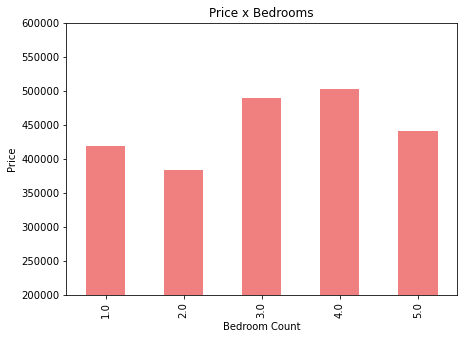

In [25]:
task3b_1 = complete_df[["Bedrooms","Price"]].copy()
avg_rooms = task3b_1.groupby(["Bedrooms"])["Price"].mean()
task3b_graph1 = avg_rooms.plot(kind="bar", x="Bedrooms", y="Price", figsize=(7,5), title="Price x Bedrooms", color="lightcoral")
task3b_graph1.set(xlabel="Bedroom Count", ylabel="Price")
plt.ylim(200000, 600000)
plt.show()

**Price x Bathrooms --> The trend in house prices compared to the number of bedrooms that the house has (range 1-3)**

**From the graph below, we can see:**
- There is a linear increase in prices and bathroom count. 
- We can see a dramatic incerase in the prices (around 200,000 euros in average) when a house has 2 bathrooms instead of 1. However, the increase from 2 bathrooms to 3 is not as dramatic compared to this (around 50,000 euros in average).

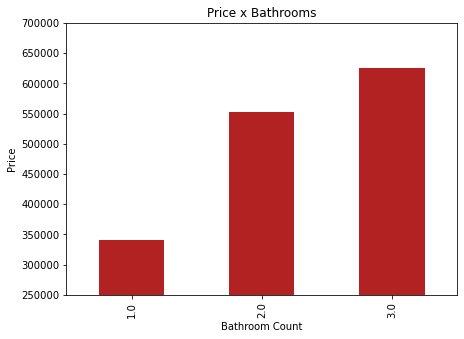

In [26]:
task3b_2 = complete_df[["Bathrooms","Price"]].copy()
avg_brooms = task3b_2.groupby(["Bathrooms"])["Price"].mean()
task3b_graph2 = avg_brooms.plot(kind="bar", x="Bathrooms", y="Price", figsize=(7,5), title="Price x Bathrooms", color="firebrick")
task3b_graph2.set(xlabel="Bathroom Count", ylabel="Price")
plt.ylim(250000, 700000)
plt.show()

**Price x Style --> The trend in house prices compared to the styles of houses: 1-Story, 1.5-Story, 2-Story**

**From the graph below, we can see:**
- There is a linear increase in prices and how many stories a house has. 
- We can see a dramatic incerase in the prices (around 200,000 euros in average) when a house has 1 sttory instead of 2. However, the increase from 1 to 1.5 story does not show the same similarity as 1.5 story houses are cheaper in average.

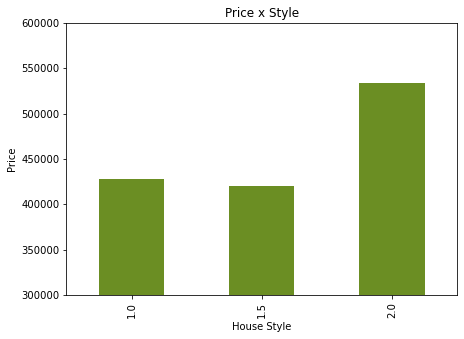

In [27]:
task3b_3 = complete_df[["Style","Price"]].copy()
avg_style = task3b_3.groupby(["Style"])["Price"].mean()
task3b_graph3 = avg_style.plot(kind="bar", x="Style", y="Price", figsize=(7,5), title="Price x Style", color="olivedrab")
task3b_graph3.set(xlabel="House Style", ylabel="Price")
plt.ylim(300000, 600000)
plt.show()

### Task 3c: Regression

**Library for linear regression is added and the regression model is initialised:**

In [28]:
from sklearn.linear_model import LinearRegression
prediction_df = complete_df[['Price', 'Size']].copy()
model = LinearRegression()

**The "Size" attribute is chosen as the most suitable atttribute for price predicttions. An array is created to store price predictions according to different sizes of houses:** 

In [29]:
size_array = prediction_df[["Size"]].values
m = model.fit(size_array, prediction_df["Price"])

s_array = size_array[0:25]
prediction = model.predict(s_array)
prediction

array([567259.21829802, 372945.81424411, 482849.0223679 , 612296.87317349,
       347452.80205045, 511741.10285405, 574340.61057404, 343770.47806692,
       540916.43903124, 287685.85124087, 546864.80854309, 528736.44431649,
       694724.27926633, 518539.23943902, 515989.93821966, 539500.16057603,
       348019.31343253, 242364.94067436, 565276.42846074, 441776.947167  ,
       719084.26869583, 392207.20123488, 364731.39920393, 402687.66180338,
       455939.73171903])

**The range of the size of the linear space for prediction is initialised with using minimum and maximum values from the Size data given:**

In [30]:
min_size = prediction_df["Size"].min()
max_size = prediction_df["Size"].max()
unseen_size = np.linspace(min_size, max_size, 20)

for s in unseen_size:
    p = model.predict(np.array([[s]]))
    print("House Size = %.2f --> Predicted Price = %.2f" % (s, p))

House Size = 624.00 --> Predicted Price = 220271.00
House Size = 780.05 --> Predicted Price = 264473.79
House Size = 936.11 --> Predicted Price = 308676.59
House Size = 1092.16 --> Predicted Price = 352879.38
House Size = 1248.21 --> Predicted Price = 397082.18
House Size = 1404.26 --> Predicted Price = 441284.98
House Size = 1560.32 --> Predicted Price = 485487.77
House Size = 1716.37 --> Predicted Price = 529690.57
House Size = 1872.42 --> Predicted Price = 573893.36
House Size = 2028.47 --> Predicted Price = 618096.16
House Size = 2184.53 --> Predicted Price = 662298.96
House Size = 2340.58 --> Predicted Price = 706501.75
House Size = 2496.63 --> Predicted Price = 750704.55
House Size = 2652.68 --> Predicted Price = 794907.34
House Size = 2808.74 --> Predicted Price = 839110.14
House Size = 2964.79 --> Predicted Price = 883312.94
House Size = 3120.84 --> Predicted Price = 927515.73
House Size = 3276.89 --> Predicted Price = 971718.53
House Size = 3432.95 --> Predicted Price = 101592

**From the predictions above, "Size" is proven to be an indicator of predicting house prices well.**

## Task 4: Classification

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Task 4a: Classifying houses on different features

**Task 4a investigates ways of classifying houses using different attributes from given data. For this, the classification functionality provided by the scitkit-learn Python package is loaded above. A class label ("target") is assigned to the "Location" values and needed columns ("Price" and "Bedrooms") are extracted from the complete dataframe:**

In [32]:
complete_df["Location"].value_counts()
target = complete_df["Location"].values
columnList = list(complete_df.columns)
columnList.remove("Location")
columnList.remove("Size")
columnList.remove("Year Built")
columnList.remove("Type")
columnList.remove("Style")
columnList.remove("Bathrooms")

data = complete_df[columnList]
idx = pd.Index(range(1,940,1))
data = data.set_index(idx)
data

,Price,Bedrooms
1,638740.0,3.0
2,465095.0,4.0
3,546330.0,3.0
4,711386.0,3.0
5,376039.0,3.0
...,...,...
935,228647.0,2.0
936,351808.0,4.0
937,410983.0,3.0
938,531880.0,4.0


**A min-max normalisation is applied to transfrom the different ranges of values in the data into the same range of [0, 1] using a scaler in scikit-learn package. This is done to scale different attributes' impact on classification to the same range to observe their true impact against each other. The normalised values in the range of [0, 1] is printed to show the change in data below:**

In [33]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled

array([[ 0.9281016 ,  0.14498248],
       [ 0.00599737,  1.52011934],
       [ 0.43737828,  0.14498248],
       ...,
       [-0.2813527 ,  0.14498248],
       [ 0.36064468,  1.52011934],
       [-0.00851032,  0.14498248]])

**k-Nearest Neighbour (kNN) classifier is used to find the most similar previous data from the training set for which a classification has been made. For this, 1 nearest neighbour is used.**

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
m = knn.fit(data_scaled, target)

penguin1 = [500000, 2.0]
unseen_data = np.array([penguin1])
unseen_scaled = normalizer.transform(unseen_data)

prediction_knn = knn.predict(unseen_scaled)
prediction_knn[0]

'West End'

**Using Scikit-learn, the dataset is divided into two sets, training set (data_train) and test test (data_test), to determine classifier's effectiveness at making predictions. The training set is contains the information classifier is trained with while learning to make predictions and the test test is new data classifier did not have access before which will be used to question classifier's abilities in making predictions.**

In [35]:
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.5)
print("Training set has %d cases" % data_train.shape[0])
print("Test set has %d cases" % data_test.shape[0])

Training set has 469 cases
Test set has 470 cases


**After the split, the model is trained using only the training set:**

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(data_train, target_train)

**Based on the training above, the test set is used to make predictions for unseen information and Scikit-learn is used to determine the accuracy of these new predictions compared to training data:**

In [37]:
predicted = knn.predict(data_test)

acc = accuracy_score(target_test, predicted)
print("Bedroom Count x Price --> Accuracy = %.3f" % acc)

Bedroom Count x Price --> Accuracy = 0.389


## Task 4b: Classification with different features

**In Task 4b, the same steps were followed from Task 4a for features "Year Built x Price", "Size x Price" and "Style x Price" to investigate the accuracy in predictions using different attributes from data:**

**Year Built x Price:**

In [38]:
complete_df["Location"].value_counts()
target = complete_df["Location"].values
columnList = list(complete_df.columns)
columnList.remove("Location")
columnList.remove("Size")
columnList.remove("Type")
columnList.remove("Style")
columnList.remove("Bedrooms")
columnList.remove("Bathrooms")

data = complete_df[columnList]
idx = pd.Index(range(1,940,1))
data = data.set_index(idx)
data

,Price,Year Built
1,638740.0,2011
2,465095.0,2002
3,546330.0,2009
4,711386.0,2007
5,376039.0,1963
...,...,...
935,228647.0,1946
936,351808.0,1912
937,410983.0,1968
938,531880.0,2010


In [39]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled

array([[ 0.9281016 ,  0.94414585],
       [ 0.00599737,  0.66414246],
       [ 0.43737828,  0.88192288],
       ...,
       [-0.2813527 , -0.39364812],
       [ 0.36064468,  0.91303436],
       [-0.00851032,  0.78858841]])

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
m = knn.fit(data_scaled, target)

penguin1 = [500000, 2015]
unseen_data = np.array([penguin1])
unseen_scaled = normalizer.transform(unseen_data)

prediction = knn.predict(unseen_scaled)
prediction[0]

'Beacon Hill'

In [41]:
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.5)
print("Training set has %d cases" % data_train.shape[0])
print("Test set has %d cases" % data_test.shape[0])

Training set has 469 cases
Test set has 470 cases


In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(data_train, target_train)

In [43]:
predicted = knn.predict(data_test)

acc = accuracy_score(target_test, predicted)
print("Year Built x Price --> Accuracy = %.3f" % acc)

Year Built x Price --> Accuracy = 0.551


**Size x Price:**

In [44]:
complete_df["Location"].value_counts()
target = complete_df["Location"].values
columnList = list(complete_df.columns)
columnList.remove("Location")
columnList.remove("Year Built")
columnList.remove("Type")
columnList.remove("Style")
columnList.remove("Bedrooms")
columnList.remove("Bathrooms")

data = complete_df[columnList]
idx = pd.Index(range(1,940,1))
data = data.set_index(idx)
data

,Price,Size
1,638740.0,1849
2,465095.0,1163
3,546330.0,1551
4,711386.0,2008
5,376039.0,1073
...,...,...
935,228647.0,887
936,351808.0,2411
937,410983.0,1453
938,531880.0,2283


In [45]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled

array([[ 0.9281016 ,  0.81576456],
       [ 0.00599737, -0.71883176],
       [ 0.43737828,  0.14913234],
       ...,
       [-0.2813527 , -0.0700957 ],
       [ 0.36064468,  1.78663162],
       [-0.00851032,  0.56969227]])

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
m = knn.fit(data_scaled, target)

penguin1 = [10000000, 6000]
unseen_data = np.array([penguin1])
unseen_scaled = normalizer.transform(unseen_data)

prediction = knn.predict(unseen_scaled)
prediction[0]

'Beacon Hill'

In [47]:
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.5)
print("Training set has %d cases" % data_train.shape[0])
print("Test set has %d cases" % data_test.shape[0])

Training set has 469 cases
Test set has 470 cases


In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(data_train, target_train)

In [49]:
predicted = knn.predict(data_test)

acc = accuracy_score(target_test, predicted)
print("Size x Price --> Accuracy = %.3f" % acc)

Size x Price --> Accuracy = 0.430


**Style x Price:**

In [50]:
complete_df["Location"].value_counts()
target = complete_df["Location"].values
columnList = list(complete_df.columns)
columnList.remove("Location")
columnList.remove("Size")
columnList.remove("Year Built")
columnList.remove("Type")
columnList.remove("Bedrooms")
columnList.remove("Bathrooms")

data = complete_df[columnList]
idx = pd.Index(range(1,940,1))
data = data.set_index(idx)
data

,Price,Style
1,638740.0,2.0
2,465095.0,1.0
3,546330.0,1.0
4,711386.0,2.0
5,376039.0,1.0
...,...,...
935,228647.0,1.0
936,351808.0,2.0
937,410983.0,1.0
938,531880.0,2.0


In [51]:
normalizer = StandardScaler()
data_scaled = normalizer.fit_transform(data.values)
data_scaled

array([[ 0.9281016 ,  1.32242334],
       [ 0.00599737, -0.8111772 ],
       [ 0.43737828, -0.8111772 ],
       ...,
       [-0.2813527 , -0.8111772 ],
       [ 0.36064468,  1.32242334],
       [-0.00851032,  1.32242334]])

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)
m = knn.fit(data_scaled, target)

penguin1 = [800000, 2.0]
unseen_data = np.array([penguin1])
unseen_scaled = normalizer.transform(unseen_data)

prediction = knn.predict(unseen_scaled)
prediction[0]

'Rivermont'

In [53]:
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.5)
print("Training set has %d cases" % data_train.shape[0])
print("Test set has %d cases" % data_test.shape[0])

Training set has 469 cases
Test set has 470 cases


In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(data_train, target_train)

In [55]:
predicted = knn.predict(data_test)

acc = accuracy_score(target_test, predicted)
print("Style x Price --> Accuracy = %.3f" % acc)

Style x Price --> Accuracy = 0.398


**From the calculations above, we can conclude the accuracies of making predictions using different attributes in the data:**
- Bedrooms x Price --> 0.368
- Year Built x Price --> 0.560
- Size x Price --> 0.370
- Style x Price --> 0.383

**In Task 4a, I investigated Bedroom count's accuracy in making price predictions which was the attribute that I suspected would reflect the most accurate results. However, after making predictions in Task 4b for other attributes in data, I can conclude that the "Year Built" attribute has the highest accuracy in making predictions of house prices.** 